### Point to Dependencies
Modify paths to fit your locations and install directories

In [1]:
import sys
sys.path.insert(0, '/home/chris/Documents/work/io') # path to io directory conatining platinum.py

import platinum
import numpy as np
import pandas as pd
import scipy as sc
import scipy.stats

### Create a New Data Set

In [2]:
# Generate a list of waveforms
waveforms = [
    {'PW': 1e-6, 'PRI': 100e-6, 'BW': 0, 'RF': 100e6},
    {'PW': 10e-6, 'PRI': 100e-6, 'BW': 1e6, 'RF': 101e6},
    {'PW': 20e-6, 'PRI': 100e-6, 'BW': 1e6, 'RF': 102e6},
    {'PW': 25e-6, 'PRI': 200e-6, 'BW': 1e6, 'RF': 100e6},
]

# Model for variations of parameters
waveform_variation = {
    'PW': sc.stats.norm(scale=0.01e-6),
    'PRI': sc.stats.rayleigh(scale=0.1e-6),
    'BW': sc.stats.norm(scale=10),
    'RF': sc.stats.norm(scale=10),
}

# Probabilities of each waveform
waveform_probabilty = [0.7, 0.2, 0.05, 0.05]

# Generate data by sampling waveforms appropriately
scheduler = np.random.choice(waveforms, size=10000, p=waveform_probabilty)
data = pd.DataFrame.from_records(scheduler)

# Add variation to each parameter
for i in data.columns:
    data[i] = data[i] - waveform_variation[i].rvs(size=data.shape[0])
    
# Generate other parameters
data['SNR'] = np.random.rand(data.shape[0])
data['TOA'] = np.cumsum(data['PRI'])

### Platinum format

In [3]:
# Save generated data to a platinum file
f = platinum.PlatFile(data=data)
f.write('test.tmp', overwrite=True)

# Read data back in
f2 = platinum.PlatFile('test.tmp')

### Plot Data

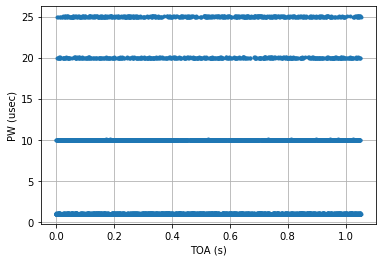

In [4]:
import matplotlib.pyplot as plt
plt.plot(f2.data.TOA, f2.data.PW/1e-6, '.')
plt.xlabel('TOA (s)')
plt.ylabel('PW (usec)')
plt.grid()

In [5]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, show, curdoc
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, DataRange1d, Select, CustomJS

output_notebook()

######### update this line #######
x, y = 'TOA', 'PW'

scale = {'PW': 1/1e-6, 'PRI': 1/1e-6, 'RF': 1/1e6, 'BW': 1/1e6}

p = figure()
p.scatter(data[x], data[y]*scale[y])
show(p)

Loading BokehJS ...